In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/knn.csv')
#data.columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


In [4]:
# Seperate features and target
features = data[['x1','x2']]
target = data['y']

In [5]:

class knn():
    def __init__(self,distance='L2',k = 5):
        self.distance = distance
        self.k=k
    def fit(self,features,target):
        self.features = features
        self.target = target
    def eucledian_distance(self,p1,p2):
        return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    def manhattan_distance(self,p1,p2):
        return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])
    def nearest_neighbors_indices(self,p):
        if self.distance=='L1':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.manhattan_distance\
                                      (p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        elif self.distance=='L2':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.eucledian_distance\
                                      (p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        
    def predict(self,test):
        # test - data observations to predict outcomes
        # test is a DataFrame
        outputs =[]
        for _,feature in test.iterrows():
            ind = self.nearest_neighbors_indices(feature)
            outputs.append(self.target[ind].\
                           value_counts().index[0])
        return outputs

In [6]:
features.iloc[5,:]

x1    28
x2    19
Name: 5, dtype: int64

In [7]:
test = pd.DataFrame(np.array([[23,49],[34,43],[12,27],[60,10]]))

In [8]:
test

,0,1
0,23,49
1,34,43
2,12,27
3,60,10


In [9]:
obj = knn()
obj.fit(features,target)
obj.predict(test)

[0, 0, 0, 1]

In [10]:
pred = np.array(obj.predict(features))

pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

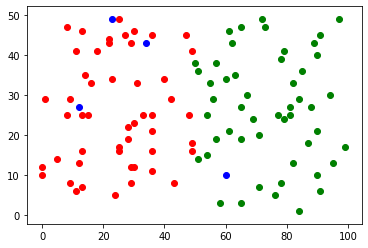

In [11]:
plt.scatter(features['x1'][:50],features['x2'][:50],
            color = 'r')
plt.scatter(features['x1'][50:],features['x2'][50:],
            color = 'g')
plt.scatter(test[0],test[1],color='b')

In [12]:

from sklearn.neighbors import KNeighborsClassifier
obj1 = KNeighborsClassifier()
obj1.fit(features,target)
obj1.predict(test)

array([0, 0, 0, 1], dtype=int64)

In [13]:
obj1.predict(features)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
def accuracy(y,y_pred):
            return round((y==y_pred).sum() /(y.shape[0])*100,2)

In [15]:
accuracy(np.array([1,1,0]),np.array([0,1,0]))

66.67

In [16]:
accuracy(obj1.predict(features),np.array(target))

98.0

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(obj1.predict(features),target)

0.98

Apply scaling for the features and predict the accuracy

In [18]:
# import the minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# create an instance for the MinMaxScaler class
sc = MinMaxScaler()
#fit the scaler with the data
sc.fit(features)
sc.transform(features)
features_sc = pd.DataFrame(sc.transform(features),\
                          columns = features.columns)

In [19]:
features_sc

,x1,x2
0,0.090909,0.583333
1,0.363636,0.208333
2,0.151515,0.500000
3,0.000000,0.187500
4,0.494949,0.312500
5,0.282828,0.375000
6,0.252525,0.333333
7,0.292929,0.145833
8,0.484848,0.500000
9,0.292929,0.229167


In [20]:
features_sc.describe()

,x1,x2
count,100.000000,100.000000
mean,0.495556,0.524792
std,0.285706,0.281130
min,0.000000,0.000000
25%,0.252525,0.307292
50%,0.500000,0.500000
75%,0.744949,0.770833
max,1.000000,1.000000


In [21]:
# import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# create an instance
knc = KNeighborsClassifier()
# train the model using fit
# both the features and target as input
knc.fit(features_sc,target)
# predict the values for features
knc.predict(features_sc)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
accuracy_score(target,knc.predict(features_sc))

0.97

In [23]:
test

,0,1
0,23,49
1,34,43
2,12,27
3,60,10


In [24]:
knc.predict(test)

array([1, 1, 1, 1], dtype=int64)

In [25]:
knc.predict(sc.transform(test))

array([0, 0, 0, 1], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=\
             train_test_split(features,target)

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [28]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(75, 2)
(75,)
(25, 2)
(25,)


In [29]:
# Train the KNN with X_train,X_test

knc1 = KNeighborsClassifier()
knc1.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
# predict the output for X_test store it in variable y_pred
Y_pred = knc1.predict(X_test)

# calculate the accuracy for y_pred,y_test
accuracy_score(Y_pred,Y_test)

1.0

In [31]:
# predict the output for X_train store it in variable y_out
Y_out = knc1.predict(X_train)

# calculate the accuracy for y_out,y_train
accuracy_score(Y_out,Y_train)

0.96

In [32]:
X_train.head()

,x1,x2
38,12,13
30,13,25
47,23,34
50,58,3
51,62,43


In [33]:
Orange_Data = pd.read_csv('https://raw.githubusercontent.com/sumathi16/Machine-Learning-with-Python/master/data/Intel%20Data/Orange_Telecom_Churn_Data.csv')
Orange_Data

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
